### Week 2 Task


#### 1. How can we read and load NIfTI and DICOM files in Python?
#### 2. What is the internal structure and metadata of these formats?

In [1]:
#using nibabel library to load NIfTI files
import nibabel as nb

nii_path = 'Sample_Data/NIfTI/sub-65304_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii'
nii0 = nb.load(nii_path)
nii0_data = nii0.get_fdata()
print(f"Shape of .nii file: {nii0_data.shape}")
print(f"Data type of .nii file: {nii0_data.dtype}")
print(f"Dimension of .nii file: {nii0_data.ndim}")
print("Total Voxels:", (nii0_data.shape[0] * nii0_data.shape[1] * nii0_data.shape[2]))

Shape of .nii file: (256, 384, 384)
Data type of .nii file: float64
Dimension of .nii file: 3
Total Voxels: 37748736


In [2]:
#checking affine matrix of NIfTI file
aff = nii0.affine
print(f"Affine transformation: {aff}")

Affine transformation: [[ 6.29997253e-01  5.55168139e-04  1.25112594e-03 -8.05287628e+01]
 [-6.74987154e-04  6.22265875e-01  5.83925396e-02 -1.00282349e+02]
 [-1.20333256e-03 -5.83937392e-02  6.22264981e-01 -1.19656151e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [3]:
#using simpleitk library to load NIfTI data
import SimpleITK as sitk
import numpy as np

nii1 = sitk.ReadImage(nii_path)
print(f"Image dimensions: {nii1.GetSize()}")
nii1_arr = sitk.GetArrayFromImage(nii1)
print(f"Available fields: {nii1.GetMetaDataKeys()}")

Image dimensions: (256, 384, 384)
Available fields: ('ITK_FileNotes', 'ITK_original_direction', 'ITK_original_spacing', 'ITK_sform_corrected', 'aux_file', 'bitpix', 'cal_max', 'cal_min', 'datatype', 'descrip', 'dim[0]', 'dim[1]', 'dim[2]', 'dim[3]', 'dim[4]', 'dim[5]', 'dim[6]', 'dim[7]', 'dim_info', 'intent_code', 'intent_name', 'intent_p1', 'intent_p2', 'intent_p3', 'nifti_type', 'pixdim[0]', 'pixdim[1]', 'pixdim[2]', 'pixdim[3]', 'pixdim[4]', 'pixdim[5]', 'pixdim[6]', 'pixdim[7]', 'qfac', 'qform_code', 'qform_code_name', 'qoffset_x', 'qoffset_y', 'qoffset_z', 'qto_xyz', 'quatern_b', 'quatern_c', 'quatern_d', 'scl_inter', 'scl_slope', 'sform_code', 'sform_code_name', 'slice_code', 'slice_duration', 'slice_end', 'slice_start', 'srow_x', 'srow_y', 'srow_z', 'toffset', 'vox_offset', 'xyzt_units')


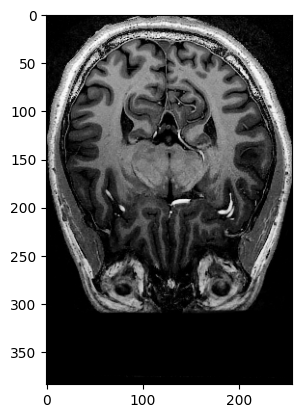

In [4]:
#visualizing a slice of NIfTI file
import matplotlib.pyplot as plt
slice_number = nii1_arr.shape[0] // 2
slice_to_show = nii1_arr[slice_number, :, : ]
plt.imshow(slice_to_show, cmap="gray")
plt.show()

In [5]:
#using pydicom library to load DICOM file
import pydicom as dicom
import os
series_path = [f'Sample_Data/DICOM/ST000000/SE00000{i}' for i in range(3)]
for dcm_path in series_path:
  print('Series Name: ',dcm_path[-8:])
  dcm_files = os.listdir(dcm_path)
  dcm_file = dcm_files[0] # first file in the series
  dcm1_path = os.path.join(dcm_path, dcm_file)
  dcm1 = dicom.dcmread(dcm1_path, force=True)
  # metadata of DICOM file
  print('Patient Name:', str(getattr(dcm1, 'PatientName', 'Unknown')))
  print('Study Date:', str(getattr(dcm1, 'StudyDate', 'Unknown')))
  print('Patient ID:', str(getattr(dcm1, 'PatientID', 'Unknown')))
  print('ImagePositionPatient', getattr(dcm1, 'ImagePositionPatient', 'Unknown'))
  print('ImageOrientationPatient', getattr(dcm1, 'ImageOrientationPatient', 'Unknown'))
  print('Modality:', str(getattr(dcm1, 'Modality', 'Unknown')))
  print('Slice Location:', str(getattr(dcm1, 'SliceLocation', 'Unknown')))
  print('Pixel Spacing:', str(getattr(dcm1, 'PixelSpacing', 'Unknown')))
  print('Slice Thickness:', str(getattr(dcm1, 'SliceThickness', 'Unknown')))
  print('Rows:', str(getattr(dcm1, 'Rows', 'Unknown')))
  print('Columns:', str(getattr(dcm1, 'Columns', 'Unknown')))
  print('Pixel Representation:', str(getattr(dcm1, 'PixelRepresentation', 'Unknown')))
  print('Bits Allocated:', str(getattr(dcm1, 'BitsAllocated', 'Unknown')))
  print('Bits Stored:', str(getattr(dcm1, 'BitsStored', 'Unknown')))
  print('No. of Files:', len(dcm_files))
  print()
  print()

Series Name:  SE000000
Patient Name: LIONHEART^WILLIAM
Study Date: 20150114
Patient ID: RJN7270540X
ImagePositionPatient [24.4212673083093, -142.23910105228, 104.601310133934]
ImageOrientationPatient [0.00187154288869, 0.98596811294555, 0.16692316532135, -1.6212202899E-4, 0.16692376136779, -0.9859697818756]
Modality: MR
Slice Location: 0.0
Pixel Spacing: [0.9765625, 0.9765625]
Slice Thickness: 10.0
Rows: 256
Columns: 256
Pixel Representation: 0
Bits Allocated: 16
Bits Stored: 12
No. of Files: 5


Series Name:  SE000001
Patient Name: LIONHEART^WILLIAM
Study Date: 20150114
Patient ID: RJN7270540X
ImagePositionPatient [-123.44543749094, -139.32323336601, -49.273824036121]
ImageOrientationPatient [0.99935883283615, -0.0323828160762, 0.01527170091867, 0.03418818861246, 0.98977828025817, -0.1384561806917]
Modality: MR
Slice Location: 0.0
Pixel Spacing: [0.9375, 0.9375]
Slice Thickness: 5.0
Rows: 256
Columns: 256
Pixel Representation: 0
Bits Allocated: 16
Bits Stored: 12
No. of Files: 27


Se

#### 3. How do we stack DICOM slices into a 3D volume?

In [6]:
#functions to sort and convert slices
def sort_slices(series):
    sorted_series = sorted(series, key=lambda x: x.SliceLocation)
    return sorted_series
def convert_to_3d_numpy(series):
    arr = series[0].pixel_array
    for image in series[1:]:
        arr = np.dstack((arr, image.pixel_array)) # dstacking stacks slices along third dimension
    return arr

In [7]:
# saving all files into list
dcm_path = series_path[0]
dcm_files = os.listdir(dcm_path)
series0 = [dicom.dcmread(os.path.join(dcm_path, dcm_file), force=True) for dcm_file in dcm_files]
dcm_path = series_path[1]
dcm_files = os.listdir(dcm_path)
series1 = [dicom.dcmread(os.path.join(dcm_path, dcm_file), force=True) for dcm_file in dcm_files]
dcm_path = series_path[2]
dcm_files = os.listdir(dcm_path)
series2 = [dicom.dcmread(os.path.join(dcm_path, dcm_file), force=True) for dcm_file in dcm_files]

In [8]:
# sorting slices
sorted_series0 = sort_slices(series0)
sorted_series1 = sort_slices(series1)
sorted_series2 = sort_slices(series2)

In [9]:
arr0 = convert_to_3d_numpy(sorted_series0)
print(f"Shape of arr0: {arr0.shape}")
print(arr0) #

Shape of arr0: (256, 256, 5)
[[[ 8 18 17  8 15]
  [12 24 13 10 13]
  [10 18  3  9  9]
  ...
  [ 5  8 11  8  2]
  [ 9  9  3  7  2]
  [ 5  3 10  3  7]]

 [[ 4  7  3 13  4]
  [13  5  9 12  7]
  [16  2  6  3 14]
  ...
  [ 2 12  5  8  3]
  [ 7  7 11  9  8]
  [ 5  3  9  7 11]]

 [[13  2 15 12  6]
  [18  3 16  9  0]
  [11  3  9  4  7]
  ...
  [ 8  4 18  8 13]
  [10  2 14  7 10]
  [ 6  0  6 12  6]]

 ...

 [[10  2  7  8 10]
  [10  4 10 14  8]
  [ 7 12  8  5  9]
  ...
  [24  5  5  4  5]
  [17  9  5 14  2]
  [ 3  5  9 11  2]]

 [[16  9 13  9  6]
  [13 12 21 10  5]
  [ 7  4 15  3  4]
  ...
  [10 12 10  7  8]
  [14 14 20  8  9]
  [16  4 15  1  7]]

 [[11  9 15 14  7]
  [ 9  9 10  5 15]
  [11  4  9  7 15]
  ...
  [ 6 10  7  2  5]
  [ 8  6 16  2 12]
  [13  4 19  9 14]]]


In [10]:
arr1 = convert_to_3d_numpy(sorted_series1)
print(f"Shape of arr1: {arr1.shape}")
arr2 = convert_to_3d_numpy(sorted_series2)
print(f"Shape of arr2: {arr2.shape}")

Shape of arr1: (256, 256, 27)
Shape of arr2: (256, 256, 32)


#### 4. How can we visualize anatomical planes from a 3D image volume?

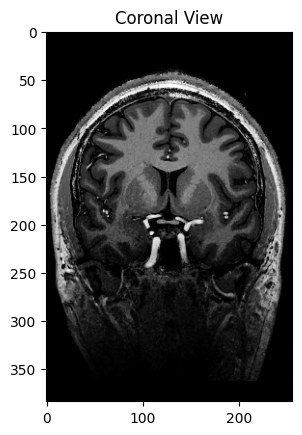

In [11]:
coronal_view = nii1_arr[::-1, nii1_arr.shape[1] // 2, ::-1]
plt.imshow(coronal_view, cmap="gray")
plt.title("Coronal View")
plt.show()

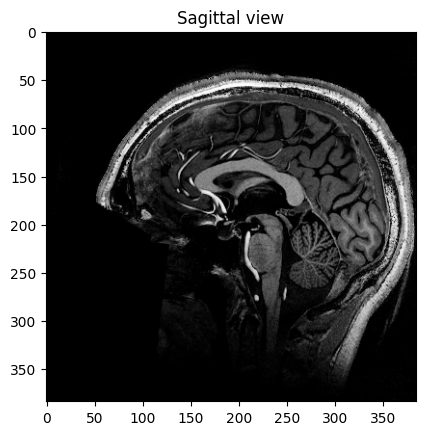

In [12]:
sagittal_view = nii1_arr[::-1, ::-1, nii1_arr.shape[2] // 2]
plt.imshow(sagittal_view, cmap="gray")
plt.title('Sagittal view')
plt.show()

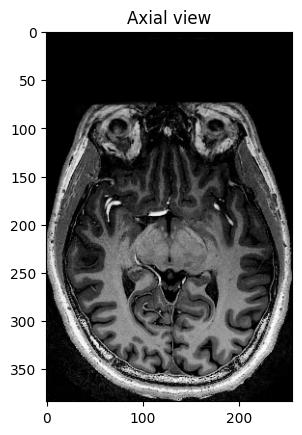

In [13]:
axial_view = nii1_arr[nii1_arr.shape[0] // 2, ::-1, ::-1]
plt.imshow(axial_view, cmap="gray")
plt.title('Axial view')
plt.show()

#### 5. How do we interpret image orientation?

**NIfTI Orientation:**<br>
RAS -> Right, Anterior, Superior <br>
The correspondence is like:  <br>
X Axis: Right: Patient's Right Side  <br>
Y Axis: Anterior: toward the front of the  <br>
Z Axis: Superior: toward the top of the head  <br>
<br>
Affine Matrix converts voxel coordinates, i.e, (i,j,k) to real world coordinates (x,y,z)

**DICOM Orientation** <br>
DICOM stores orientation using two tags: <br>
1. ImagePositionPatient: consists of three values
2. ImageOrientationPatient: consists of six values
<br><br>
The affine matrix can be calculated using above tags

The key difference here is the way orientation is stored:<br>
NIfTI encodes the affine matrix whereas, DICOM stores tags having orientation and position values.

#### 6. What are the key differences between DICOM and NIfTI?

**Key Differences in DICOM and NIfTI:** <br>
1. DICOM has multiple files of 2D slices whereas a single NIfTI file stores 3D volume scan.
2. DICOM has lot of metadata info like patient name, study date, Patient ID, etc., NIfTI only has affine matrix, voxel size, data type.
3. DICOM has clinical usage whereas NIfTI is mainly used for research purposes
